In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from wrangle import wrangle_zillow
from wrangle import tts_con
from prepare import remove_outliers

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression

# Q1
### load zillow

In [2]:
zillow=wrangle_zillow()

In [3]:
zillow, fences=remove_outliers(zillow)

fips_code column ignored


In [26]:
fences

,bedroom_count,bathroom_count,calc_finished_square_ft,tax_value_dollar_count,year_built,tax_amount
upper_fence,5.5,4.5,3633.0,1052766.0,2016.5,12218.55
lower_fence,1.5,0.5,-167.0,-328994.0,1908.5,-3265.77


In [4]:
ztrain, zval, ztest = tts_con(zillow)

In [5]:
ztrain.head()

,bedroom_count,bathroom_count,calc_finished_square_ft,tax_value_dollar_count,year_built,tax_amount,fips_code
1997521,4.0,2.0,1174.0,235927.0,1954.0,2926.88,6037.0
405332,3.0,2.5,2202.0,565923.0,1966.0,6213.46,6059.0
1161201,4.0,2.0,1725.0,460000.0,1959.0,5426.41,6037.0
307011,3.0,2.0,2228.0,140260.0,1976.0,2020.13,6037.0
18179,3.0,2.0,1679.0,454548.0,1940.0,5419.54,6059.0


# Q2
### Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

In [6]:
df= ztrain[['calc_finished_square_ft', 'tax_value_dollar_count']]
df.head()

,calc_finished_square_ft,tax_value_dollar_count
1997521,1174.0,235927.0
405332,2202.0,565923.0
1161201,1725.0,460000.0
307011,2228.0,140260.0
18179,1679.0,454548.0


In [7]:
df['yhat_baseline']= df['tax_value_dollar_count'].mean()
df.head()

/var/folders/qf/t052sdrx70bffjpl89m9_hz00000gn/T/ipykernel_15105/3372319244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yhat_baseline']= df['tax_value_dollar_count'].mean()


,calc_finished_square_ft,tax_value_dollar_count,yhat_baseline
1997521,1174.0,235927.0,342945.373318
405332,2202.0,565923.0,342945.373318
1161201,1725.0,460000.0,342945.373318
307011,2228.0,140260.0,342945.373318
18179,1679.0,454548.0,342945.373318


In [8]:
model=LinearRegression().fit(df[['calc_finished_square_ft']], df['tax_value_dollar_count'])
predictions=model.predict(df[['calc_finished_square_ft']])

In [9]:
df['yhat']=predictions
df.head()

/var/folders/qf/t052sdrx70bffjpl89m9_hz00000gn/T/ipykernel_15105/619781725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yhat']=predictions


,calc_finished_square_ft,tax_value_dollar_count,yhat_baseline,yhat
1997521,1174.0,235927.0,342945.373318,258353.380573
405332,2202.0,565923.0,342945.373318,428699.190367
1161201,1725.0,460000.0,342945.373318,349657.408974
307011,2228.0,140260.0,342945.373318,433007.547424
18179,1679.0,454548.0,342945.373318,342034.931104


# Q3
### Plot the residuals for the linear regression model that you made.



In [10]:
df['residual'] = df['yhat'] - df['tax_value_dollar_count']
df['residual_baseline'] = df['yhat_baseline'] - df['tax_value_dollar_count']
df.head()

/var/folders/qf/t052sdrx70bffjpl89m9_hz00000gn/T/ipykernel_15105/3522406211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['residual'] = df['yhat'] - df['tax_value_dollar_count']
/var/folders/qf/t052sdrx70bffjpl89m9_hz00000gn/T/ipykernel_15105/3522406211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['residual_baseline'] = df['yhat_baseline'] - df['tax_value_dollar_count']


,calc_finished_square_ft,tax_value_dollar_count,yhat_baseline,yhat,residual,residual_baseline
1997521,1174.0,235927.0,342945.373318,258353.380573,22426.380573,107018.373318
405332,2202.0,565923.0,342945.373318,428699.190367,-137223.809633,-222977.626682
1161201,1725.0,460000.0,342945.373318,349657.408974,-110342.591026,-117054.626682
307011,2228.0,140260.0,342945.373318,433007.547424,292747.547424,202685.373318
18179,1679.0,454548.0,342945.373318,342034.931104,-112513.068896,-111602.626682


Text(0.5, 1.0, 'Residual of Tax Value Dollar Count and Predictions')

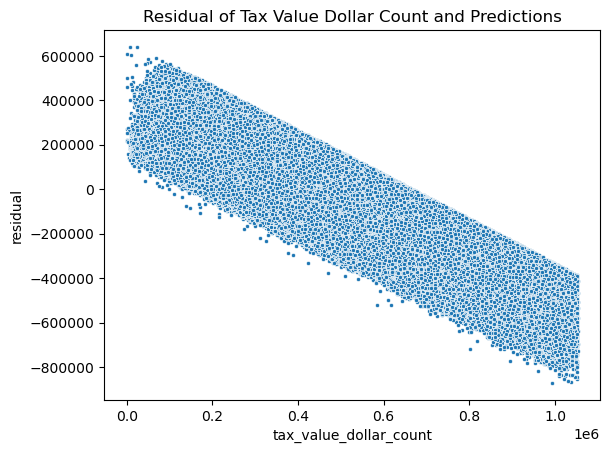

In [28]:
sns.scatterplot(x='tax_value_dollar_count', y='residual', data=df, marker='.')
plt.title('Residual of Tax Value Dollar Count and Predictions')

Text(0.5, 1.0, 'Residual of Tax Value Dollar Count and Baseline Predictions')

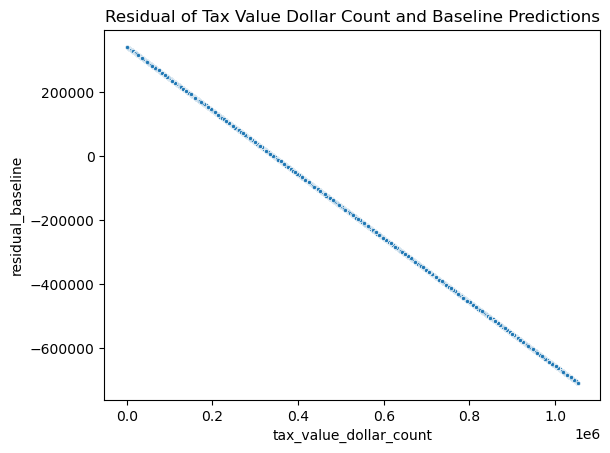

In [29]:
sns.scatterplot(x='tax_value_dollar_count', y='residual_baseline', data=df, marker='.')
plt.title('Residual of Tax Value Dollar Count and Baseline Predictions')

# Q4
### Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.



In [13]:
#Sum of squared errors
sse=mean_squared_error(df['tax_value_dollar_count'], df['yhat'])*len(df)
sse

3.912210379803447e+16

In [14]:
#explained sum of squares
ess= sum((df['yhat']-df['tax_value_dollar_count'].mean())**2)
ess

1.0306684089962164e+16

In [15]:
#total sum of squares
tss=ess+sse
tss

4.942878788799664e+16

In [16]:
# mean squared error
mse=mean_squared_error(df['tax_value_dollar_count'], df['yhat'])
mse

36892400874.010994

In [17]:
#root mean squared error
rmse=mean_squared_error(df['tax_value_dollar_count'], df['yhat'], squared=False)
rmse

192073.9463696495

# Q5
### Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [18]:
#sum of squares
sse_baseline=mean_squared_error(df['tax_value_dollar_count'], df['yhat_baseline'])*len(df)
sse_baseline

4.942878788798828e+16

In [19]:
#mean squared error
mse_baseline=mean_squared_error(df['tax_value_dollar_count'], df['yhat_baseline'])
mse_baseline

46611671675.27784

In [20]:
#root mean squared error
rmse_baseline=mean_squared_error(df['tax_value_dollar_count'], df['yhat_baseline'], squared=False)
rmse_baseline

215897.3637524966

# Q6
### Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.



In [21]:
if sse < sse_baseline:
    print('performs better than baseline')
else:
    print('does not perform better than baseline')

performs better than baseline


# Q7
### What is the amount of variance explained in your model?



In [22]:
evs=round(explained_variance_score(df['tax_value_dollar_count'], df['yhat']),3)
evs

0.209

# Q8
### Is your model better than the baseline model?

In [61]:
if rmse < rmse_baseline:
    print('the model is better than the baseline')
else:
    print('the model is not better than the baseline')

the model is better than the baseline


# Q9
### Create a file named evaluate.py that contains the following functions:

-plot_residuals(y, yhat): creates a residual plot  
-regression_errors(y, yhat): returns the following values:  
    -sum of squared errors (SSE)  
    -explained sum of squares (ESS)  
    -total sum of squares (TSS)  
    -mean squared error (MSE)  
    -root mean squared error (RMSE)  
-baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model  
-better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [49]:
def plot_residuals(df):
    sns.scatterplot(x='tax_value_dollar_count', y='residual', data=df, marker='.')
    sns.scatterplot(x='tax_value_dollar_count', y='residual_baseline', data=df, marker='.')
    plt.title('Residual of Tax Value Dollar Count and Predictions')
    plt.legend(['Residual','Residual Baseline'], shadow=True)
    plt.xlabel('Tax Value Dollar Count')
    plt.ylabel('Residual')

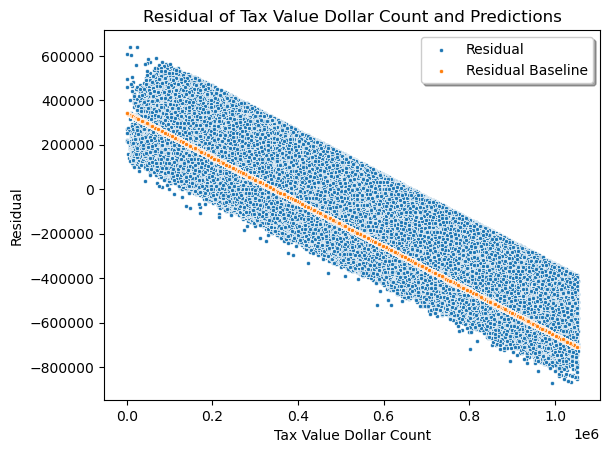

In [50]:
plot_residuals(df)

In [57]:
def regression_errors(df):
    sse=mean_squared_error(df['tax_value_dollar_count'], df['yhat'])*len(df)
    ess=sum((df['yhat']-df['tax_value_dollar_count'].mean())**2)
    tss=ess+sse
    mse=mean_squared_error(df['tax_value_dollar_count'], df['yhat_baseline'])
    rmse=mean_squared_error(df['tax_value_dollar_count'], df['yhat'], squared=False)
    return print(f'SSE = {sse}\nESS = {ess}\nTSS = {tss}\nMSE = {mse}\nRMSE = {rmse}')

In [58]:
regression_errors(df)

SSE = 3.912210379803447e+16
ESS = 1.0306684089962164e+16
TSS = 4.942878788799664e+16
MSE = 46611671675.27784
RMSE = 192073.9463696495


In [59]:
def baseline_mean_errors(df):
    sse_baseline=mean_squared_error(df['tax_value_dollar_count'], df['yhat_baseline'])*len(df)
    mse_baseline=mean_squared_error(df['tax_value_dollar_count'], df['yhat_baseline'])
    rmse_baseline=mean_squared_error(df['tax_value_dollar_count'], df['yhat_baseline'], squared=False)
    return print(f'SSE baseline = {sse_baseline}\nMSE baseline = {mse_baseline}\nRMSE baseline = {rmse_baseline}')

In [60]:
baseline_mean_errors(df)

SSE baseline = 4.942878788798828e+16
MSE baseline = 46611671675.27784
RMSE baseline = 215897.3637524966


In [62]:
def better_than_baseline(df):
    rmse=mean_squared_error(df['tax_value_dollar_count'], df['yhat'], squared=False)
    rmse_baseline=mean_squared_error(df['tax_value_dollar_count'], df['yhat_baseline'], squared=False)
    if rmse < rmse_baseline:
        print('The model performes better than the baseline!')
    else:
        print('The model does not perform better than the baseline.')

In [63]:
better_than_baseline(df)

The model performes better than the baseline!
